In [121]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from PIL import Image

In [122]:
def Grayscale(img):
    h = img.shape[0]
    w = img.shape[1]
    img_out = img_out = np.full((h,w,3),0,dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            img_out[i][j][0] = img_out[i][j][1] = img_out[i][j][2] = img[i][j][1]
    return img_out

In [123]:
img_bgr = cv2.imread("./M/m1.jpg")
img_bgr=cv2.resize(img_bgr, (200,200))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
imgGray = Grayscale(img_rgb)

In [124]:
def Histogram(img): #check
    img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    img_rgb = img.copy()
    h = img_rgb.shape[0]
    w = img_rgb.shape[1]
    
    
    # count of intensity value
    count = np.full(256,0,dtype=int)
         
    for i in range(h):
        for j in range(w):
            if img_rgb[i][j][0] != 0: 
                intensity = img_rgb[i, j]
                count[intensity] += 1
    min = count[100]
    minIn = 100
    for k in range(100,120):
       if min>count[k] and k!=0:
           min = count[k]
           minIn = k

    print(minIn)
    print(min)

    return np.arange(256), count, minIn

121


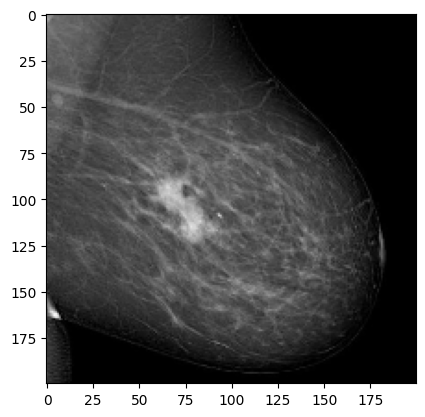

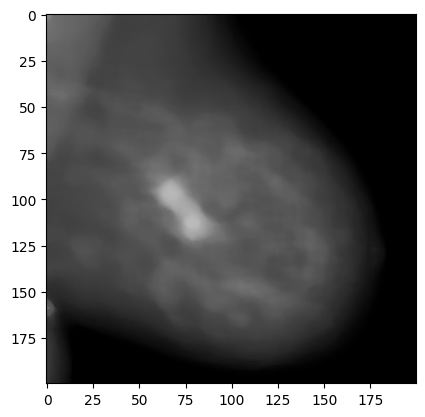

119
11


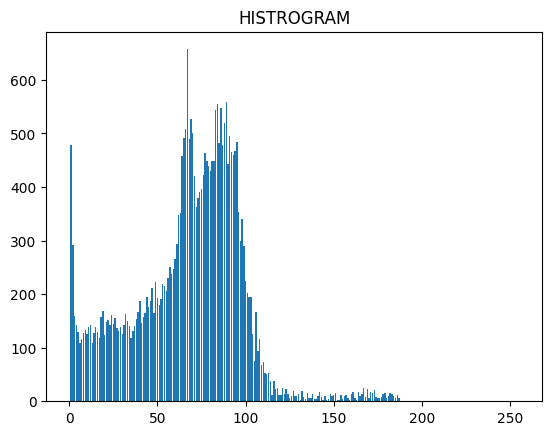

In [125]:
def median_V2(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2
   
    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0

size = 11
mask = np.full((size,size),1,dtype=np.uint16)
list = []
imH = imgGray.shape[0]
imW = imgGray.shape[1]
filterH = mask.shape[0]
filterW = mask.shape[1]
filterHCenter = int((filterH+1)/2)-1
filterWCenter = int((filterW+1)/2)-1

sumWeightMask = 0
for i in range(filterH):
    for j in range(filterW):
        sumWeightMask = sumWeightMask + mask[i][j]

imgOut = np.full((imH,imW,3),0,dtype=np.uint16)
for i in range(imH):
    for j in range(imW):
        sumMask = 0
        for fi in range(filterH):
            for fj in range(filterW):
                posX = i + (fi-filterHCenter)
                posY = j + (fj-filterWCenter)
                if posX < 0 :
                    posX = 0
                elif posX >= imH :
                    posX = imH - 1
                if posY <0:
                    posY = 0
                elif posY >= imW :
                    posY = imW - 1 
                list.append(imgGray[posX][posY][1])
        imgOut[i][j][0] = imgOut[i][j][1] = imgOut[i][j][2] = median_V2(list)
        list = []

print(sumWeightMask)
plt.imshow(imgGray)
plt.show()
plt.imshow(imgOut)
plt.show()

intensity, value, minIn  = Histogram(imgOut)
plt.bar(intensity,value)
plt.title("HISTROGRAM")
plt.show()

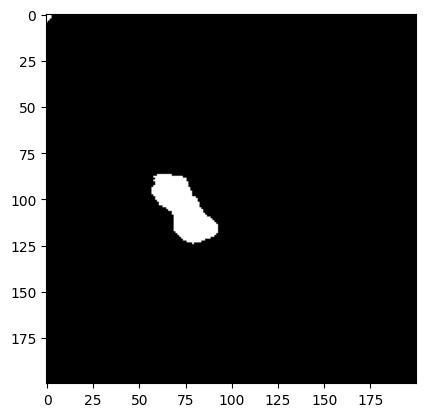

In [126]:
def THRESHOLD(img,value):
    img_rgb = img.copy()
    h =  img_rgb.shape[0]
    w = img_rgb.shape[1]
    img_out = np.zeros((h, w, 3), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            if img_rgb[i][j][0] >= value:
                img_out[i][j][0] = img_out[i][j][1] = img_out[i][j][2] = 255 #white
            else:
                img_out[i][j][0] = img_out[i][j][1] = img_out[i][j][2] = 0 #black
    return img_out
imgOut = THRESHOLD(imgOut,minIn)
plt.imshow(imgOut)
plt.show()

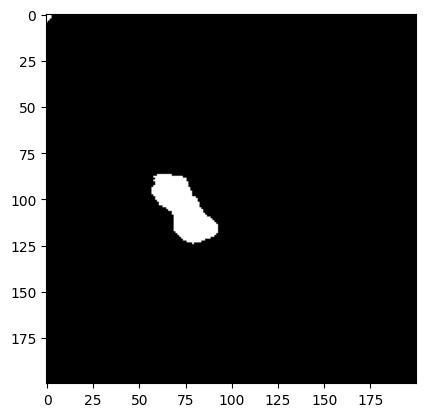

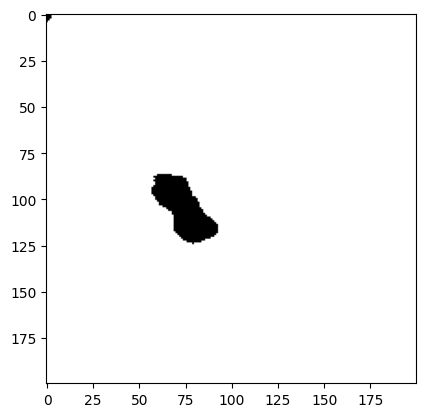

In [127]:
y = imgOut.shape[0]
x = imgOut.shape[1]
plt.imshow(imgOut)
plt.show()
C = 1.3
for i in range(y):
    for j in range(x):
        imgOut[i][j][0] = 255 - imgOut[i][j][0]
        imgOut[i][j][1] = 255 - imgOut[i][j][1]
        imgOut[i][j][2] = 255 - imgOut[i][j][2]
plt.imshow(imgOut)
plt.show()

จำนวนวัตถุ = 1
[{'Size': 725, 'X_min': 87, 'X_max': 124, 'Y_min': 57, 'Y_max': 92, 'Color': [78, 166, 105]}]
รูปที่ 1
ขนาด 725


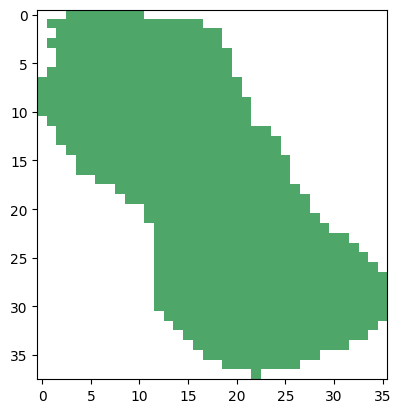

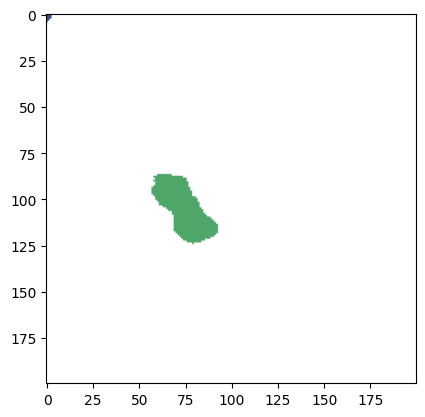

In [128]:
def print_crop(num,img):
    for x in range(num):
        print(f"รูปที่ {x+1}")
        print(f"ขนาด {object_list[x]['Size']}")
        r = object_list[x]['Color'][0]
        g = object_list[x]['Color'][1]
        b = object_list[x]['Color'][2]
        crop = imgOut[object_list[x]['X_min']:object_list[x]['X_max']+1 , object_list[x]['Y_min']:object_list[x]['Y_max']+1]
        realimg = img[object_list[x]['X_min']:object_list[x]['X_max']+1 , object_list[x]['Y_min']:object_list[x]['Y_max']+1]
        copy = crop.copy()
        h = copy.shape[0]
        w = copy.shape[1]
        pixel = 0
        
        for i in range(h):
            for j in range(w):
                if copy[i][j][0] != r and copy[i][j][1] != g and copy[i][j][2] != b :
                    copy[i][j][0] = copy[i][j][1] = copy[i][j][2] = 255
                else:
                    pixel = pixel + realimg[i][j][0]
                
        pixel_object.append({
            'object': object_list[x],
            'pixel': pixel
        })
        plt.imshow(copy)
        plt.show()



def labeling_findmax(img,numCrop):
    def recursive(x, y, color,xmin,xmax,ymin,ymax,size): 
        if 0 <= x < len(img) and 0 <= y < len(img[0]) and img[x][y][0] == 0: 
            if x <= xmin:
                xmin = x
            if x >= xmax:
                xmax = x
            if y <= ymin:
                ymin = y
            if y >= ymax:
                ymax = y
            size = size + 1
            img[x][y][0] = color[0]
            img[x][y][1] = color[1]
            img[x][y][2] = color[2]
            xmin, xmax, ymin, ymax, size = recursive(x + 1, y, color, xmin, xmax, ymin, ymax, size)  # ขวา 
            xmin, xmax, ymin, ymax, size = recursive(x - 1, y, color, xmin, xmax, ymin, ymax, size)  # ซ้าย
            xmin, xmax, ymin, ymax, size = recursive(x, y + 1, color, xmin, xmax, ymin, ymax, size)  # บน
            xmin, xmax, ymin, ymax, size = recursive(x, y - 1, color, xmin, xmax, ymin, ymax, size)  # ล่าง
        return xmin,xmax,ymin,ymax,size
            
    
    h = img.shape[0]
    w = img.shape[1]
    counting = 0
    xmax  = ymax = size = 0
    xmin = h
    ymin = w
    for i in range(h):
        for j in range(w):
            if img[i][j][0] != 0 and img[i][j][0] != 255:
                    xmax  = ymax = size = 0
                    xmin = h
                    ymin = w
            if img[i][j][0] == 0 and img[i][j][1] == 0 and img[i][j][2] == 0:
                r = int(np.random.uniform(1,255))
                g = int(np.random.uniform(1,255))
                b = int(np.random.uniform(1,255))
                color = [r,g,b]
                xmin,xmax,ymin,ymax,size = recursive(i, j,color,xmin,xmax,ymin,ymax,size)
                if size < 100:
                    continue
                if xmin == 0:
                    continue
                if ymin == 0:
                    continue
                if xmax == h-1:
                    continue
                if ymax == w-1:
                    continue
                
                counting = counting + 1
                object_list.append({
                    'Size': size,
                    'X_min': xmin,
                    'X_max': xmax,
                    'Y_min': ymin,
                    'Y_max': ymax,
                    'Color': color
                })
                # print(f"size = {size} xmin = {xmin} xmax = {xmax} ymin = {ymin} ymax = {ymax}")
    
    print(f"จำนวนวัตถุ = {counting}")
    return counting
    
pixel_object = []
sys.setrecursionlimit(90000)
counting = 0
size = 0
check = 0
xmin = xmax = ymin = ymax = 0
object_list = []
numCrop = 3
counting = labeling_findmax(imgOut,numCrop)

def myFunc(e):
  return e['Size']

# print(object_list)
object_list.sort(reverse=True,key=myFunc)
print(object_list)
# try:
#     print(f"Max 3 area object No.1 = {object_list[0]['Size']} No.2 = {object_list[1]['Size']} No.3 = {object_list[2]['Size']}")
# except:
#     print('out of range')


print_crop(counting,imgGray)

plt.imshow(imgOut)
plt.show()

In [129]:
# print(pixel_object)

# for i in range(counting):
#     print(f"รูปที่ {i+1} มีพิกเซล = {pixel_object[i]['pixel']}")
#     avg = pixel_object[i]['pixel'] / object_list[i]['Size']
#     print(f"ค่าเฉลี่ย = {avg}")

[{'object': {'Size': 725, 'X_min': 87, 'X_max': 124, 'Y_min': 57, 'Y_max': 92, 'Color': [78, 166, 105]}, 'pixel': 113753}]
รูปที่ 1 มีพิกเซล = 113753
ค่าเฉลี่ย = 156.9006896551724


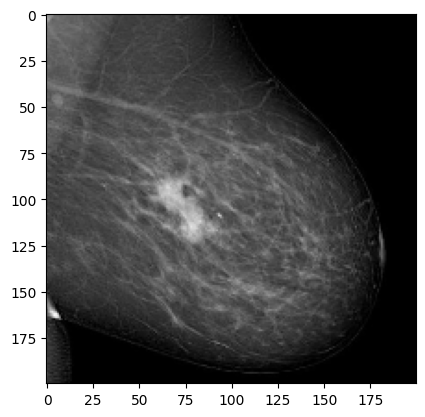

รูปที่ 1
ขนาด 725
MALIGNANT
131.57236842105263


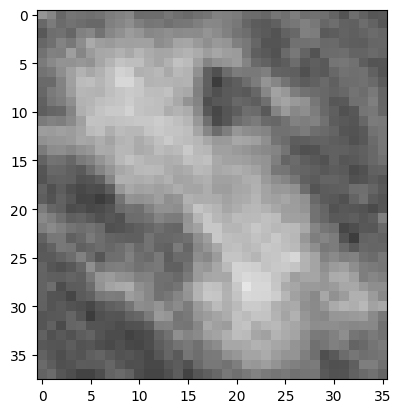

In [130]:
import cv2

num = 3
plt.imshow(img_bgr)
plt.show()
imgtest = img_bgr.copy()


for x in range(counting):
    print(f"รูปที่ {x+1}")
    print(f"ขนาด {object_list[x]['Size']}")

    crop = img_bgr[object_list[x]['X_min']:object_list[x]['X_max']+1 , object_list[x]['Y_min']:object_list[x]['Y_max']+1]
    imH = crop.shape[0]
    imW = crop.shape[1]
    sum = 0
    for i in range(imH):
        for j in range(imW):
            sum = sum + crop[i][j][1]

    avg = sum/(imH*imW)
    if (avg > 100):
        print("MALIGNANT")
    else:
        print("BENIGN")
    print(avg)
    


    plt.imshow(crop)
    plt.show()


